In [1]:
# %% Library
######################################################################################
# print("Import Libraries & Set up directory")
import numpy as np
import pandas as pd
from Bio import SeqIO
import re
import os
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean, median, quantiles, mode
from matplotlib_venn import venn2

folder_path = "/Users/nguyjust/Library/CloudStorage/OneDrive-OregonHealth&ScienceUniversity/ubsite/"

In [2]:
# Read in the iptm data
data_iptm = pd.read_csv(folder_path + '/data/iptm_info.tsv',
                        sep="\t", low_memory=False)

data_iptm.head()

data_iptm_sm = data_iptm[['uniprot_id', 'ub_mod_loc']]

In [3]:
# Read in the psp data
data_psp = pd.read_csv(folder_path + '/data/psp_info.tsv',
                       sep="\t", low_memory=False)

data_psp.drop(columns={'index', 'sequence'}, inplace=True)

data_psp.head()

data_psp_sm = data_psp[['uniprot_id', 'ub_mod_loc']]

In [28]:
# Quick EDA 
print("PSP data")

print(f"Number of unique sites: {len(data_psp['ub_mod_loc'])}")

print(f"Number of unique proteins: {len(set(data_psp['uniprot_id']))}")

print(f"Number of unique organisms: {len(set(data_psp['organism']))}")


print("\n\niPTM data")

print(f"Number of unique sites: {len(data_iptm['ub_mod_loc'])}")

print(f"Number of unique proteins: {len(set(data_iptm['uniprot_id']))}")

print(f"Number of unique organisms: {len(set(data_iptm['organism']))}")

PSP data
Number of unique sites: 126312
Number of unique proteins: 19916
Number of unique organisms: 9


iPTM data
Number of unique sites: 138781
Number of unique proteins: 23588
Number of unique organisms: 40


In [22]:
data_psp_1 = data_psp['uniprot_id'].astype(
    str) + '-' + data_psp['ub_mod_loc'].astype(str)
data_psp_1_set = set(data_psp_1)

data_iptm_1 = data_iptm['uniprot_id'].astype(
    str) + '-' + data_iptm['ub_mod_loc'].astype(str)
data_iptm_1_set = set(data_iptm_1)

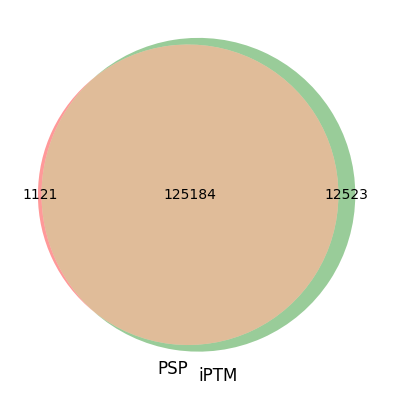

In [23]:
venn2([data_psp_1_set, data_iptm_1_set], set_labels=('PSP', 'iPTM'))
plt.show()

In [27]:
## total union across all sets
union = data_psp_1_set|data_iptm_1_set
print(f'Union: {len(union)}')

## intersection in both sets
intersection = data_psp_1_set & data_iptm_1_set
print(f'Intersection: {len(intersection)}')

## psp unique
psp_unq = data_psp_1_set.difference(data_iptm_1_set)
print(f'PSP unique: {len(psp_unq)}')

## iptm unique
iptm_unq = data_iptm_1_set.difference(data_psp_1_set)
print(f'iPTM unique: {len(iptm_unq)}')

Union: 138828
Intersection: 125184
PSP unique: 1121
iPTM unique: 12523


In [50]:
union_split = [ii.split('-') for ii in list(union)]
print(len(union_split))

keys = [ii[0] for ii in union_split]
values = [ii[1] for ii  in union_split]

ub_dict = dict(zip(keys,values))
print(len(ub_dict))

print(f'Unique proteins: {len(set(keys))}')



138828
23159
Unique proteins: 23159


In [51]:
protein_site_counter = Counter(keys)
len(protein_site_counter)

23159

In [63]:
sites_per_unique_prot = list(protein_site_counter.values())
prot_count_sites = Counter(sorted(sites_per_unique_prot))
prot_count_sites

Counter({1: 6747,
         2: 3537,
         3: 2367,
         4: 1644,
         5: 1318,
         6: 1062,
         7: 881,
         8: 743,
         9: 616,
         10: 555,
         11: 446,
         12: 378,
         13: 322,
         14: 293,
         15: 247,
         16: 222,
         17: 205,
         18: 166,
         19: 141,
         20: 132,
         21: 96,
         22: 94,
         23: 76,
         24: 97,
         25: 75,
         26: 60,
         27: 53,
         28: 49,
         29: 41,
         30: 36,
         31: 41,
         32: 43,
         33: 40,
         34: 30,
         35: 21,
         36: 23,
         37: 29,
         38: 13,
         39: 13,
         40: 16,
         41: 13,
         42: 16,
         43: 13,
         44: 9,
         45: 8,
         46: 5,
         47: 10,
         48: 5,
         49: 1,
         50: 3,
         51: 8,
         52: 7,
         53: 2,
         54: 5,
         55: 2,
         56: 2,
         57: 2,
         58: 3,
         59

In [74]:
protein_site_counter

## For each protein calcuate % for total LYSINES 
## and look at compared to total length of amino acids

## WILL ALLOW ME TO DO ENRICHMENT LATER ON!!!!
## Normalize to the protein length (ie: might see 10% of sequence is usually ub (and # of sites not actually protein))


Counter({'O94915': 22,
         'Q7Z7G8': 29,
         'Q9UR06': 4,
         'O75437': 22,
         'Q7LBC6': 52,
         'Q9NV66': 24,
         'P80316': 15,
         'O15439': 31,
         'P25344': 1,
         'Q5UIP0': 43,
         'O74747': 6,
         'Q658Y4': 11,
         'Q7L2J0': 8,
         'P36888': 8,
         'Q01853': 33,
         'Q15051': 11,
         'Q99NH2': 7,
         'Q91X83': 15,
         'Q86TM6': 3,
         'O09165': 4,
         'Q9HBM1': 16,
         'P07477': 3,
         'Q1RN00': 1,
         'Q9HCM1': 69,
         'Q8N6R0': 16,
         'Q63HN8': 143,
         'Q7Z7A1': 51,
         'Q13601': 19,
         'A0A1B0GUS4': 7,
         'Q8NHU0': 1,
         'P62482': 9,
         'P0CT53': 22,
         'O95271': 29,
         'P0CX47': 10,
         'A6NN14': 39,
         'P36383': 7,
         'Q78IR3': 1,
         'P55884': 36,
         'P63260': 9,
         'P09497': 7,
         'Q61466': 1,
         'O00159': 27,
         'Q91VS8': 2,
         'P39976': 2,
   

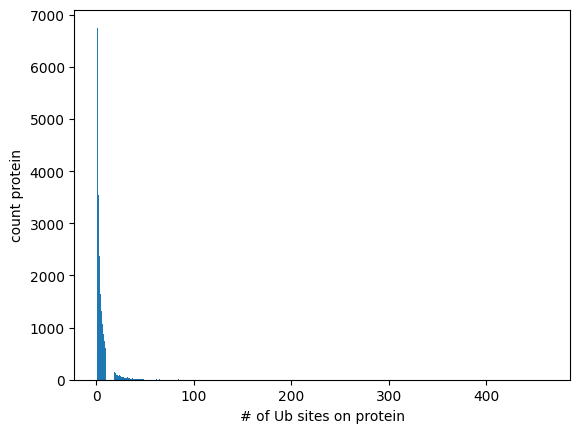

In [75]:




plt.xlabel('# of Ub sites on protein')
plt.ylabel('count protein')

plt.bar(prot_count_sites.keys(), prot_count_sites.values())
plt.show()

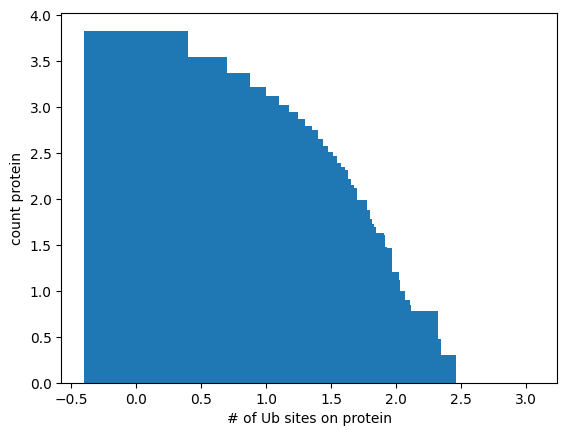

In [84]:
## zoom in from prev
plt.xlabel('# of Ub sites on protein')
plt.ylabel('count protein')


#from math import log
## Change to scatter plot
plt.bar(np.log10(list(prot_count_sites.keys())), np.log10(list(prot_count_sites.values())))
plt.show()